In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Set plotting style
sns.set(style='whitegrid')


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(40000, 17)
(5211, 16)


In [4]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown


In [6]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5211 non-null   int64 
 1   job        5211 non-null   object
 2   marital    5211 non-null   object
 3   education  5211 non-null   object
 4   default    5211 non-null   object
 5   balance    5211 non-null   int64 
 6   housing    5211 non-null   object
 7   loan       5211 non-null   object
 8   contact    5211 non-null   object
 9   day        5211 non-null   int64 
 10  month      5211 non-null   object
 11  duration   5211 non-null   int64 
 12  campaign   5211 non-null   int64 
 13  pdays      5211 non-null   int64 
 14  previous   5211 non-null   int64 
 15  poutcome   5211 non-null   object
dtypes: int64(7), object(9)
memory usage: 651.5+ KB


In [9]:
train_data['balance'] = train_data['balance'].astype(float)
train_data['duration'] = train_data['duration'].astype(float)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40000 non-null  int64  
 1   job        40000 non-null  object 
 2   marital    40000 non-null  object 
 3   education  40000 non-null  object 
 4   default    40000 non-null  object 
 5   balance    40000 non-null  float64
 6   housing    40000 non-null  object 
 7   loan       40000 non-null  object 
 8   contact    40000 non-null  object 
 9   day        40000 non-null  int64  
 10  month      40000 non-null  object 
 11  duration   40000 non-null  float64
 12  campaign   40000 non-null  int64  
 13  pdays      40000 non-null  int64  
 14  previous   40000 non-null  int64  
 15  poutcome   40000 non-null  object 
 16  y          40000 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 5.2+ MB


In [11]:
test_data['balance'] = test_data['balance'].astype(float)
test_data['duration'] = test_data['duration'].astype(float)

print(test_data.dtypes)


age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
dtype: object


In [12]:
test_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000,5211.000000
mean,43.942238,2037.724045,14.188256,283.791787,1.855498,103.462099,1.829783
std,15.954058,3898.173799,8.483453,241.441834,1.343656,137.157167,2.985956
min,18.000000,-1206.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,31.000000,270.500000,7.000000,134.500000,1.000000,-1.000000,0.000000
50%,39.000000,889.000000,13.000000,220.000000,1.000000,87.000000,1.000000
75%,56.000000,2346.500000,21.000000,355.000000,2.000000,181.000000,3.000000
max,95.000000,81204.000000,31.000000,3785.000000,16.000000,871.000000,55.000000


In [13]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550
std,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000


In [14]:
def detect_outliers_iqr(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_info = {}
    
    for col in numeric_cols:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Store outlier information
        outlier_info[col] = {
            "num_outliers": len(outliers),
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
        }
    
    return outlier_info

# Example usage
# Assuming `train_data` is your DataFrame
outlier_summary = detect_outliers_iqr(train_data)

# Print outlier summary
for col, info in outlier_summary.items():
    print(f"Column: {col}")
    print(f"  Number of Outliers: {info['num_outliers']}")
    print(f"  Lower Bound: {info['lower_bound']}")
    print(f"  Upper Bound: {info['upper_bound']}")
    print()


Column: age
  Number of Outliers: 79
  Lower Bound: 10.5
  Upper Bound: 70.5

Column: balance
  Number of Outliers: 4280
  Lower Bound: -1843.5
  Upper Bound: 3216.5

Column: day
  Number of Outliers: 0
  Lower Bound: -11.5
  Upper Bound: 40.5

Column: duration
  Number of Outliers: 3000
  Lower Bound: -219.5
  Upper Bound: 632.5

Column: campaign
  Number of Outliers: 2992
  Lower Bound: -2.0
  Upper Bound: 6.0

Column: pdays
  Number of Outliers: 5393
  Lower Bound: -1.0
  Upper Bound: -1.0

Column: previous
  Number of Outliers: 5393
  Lower Bound: 0.0
  Upper Bound: 0.0



In [15]:
# Capping the outliers
train_data['age'] = np.where(train_data['age'] > 70.5, 70.5, np.where(train_data['age'] < 10.5, 10.5, train_data['age']))


In [16]:
train_data['balance'] = np.where(train_data['balance'] > 3216.5, 3216.5,
                                 np.where(train_data['balance'] < -1843.5, -1843.5, train_data['balance']))

train_data['duration'] = np.where(train_data['duration'] > 632.5, 632.5, train_data['duration'])


train_data['campaign'] = np.where(train_data['campaign'] > 6.0, 6.0, train_data['campaign'])


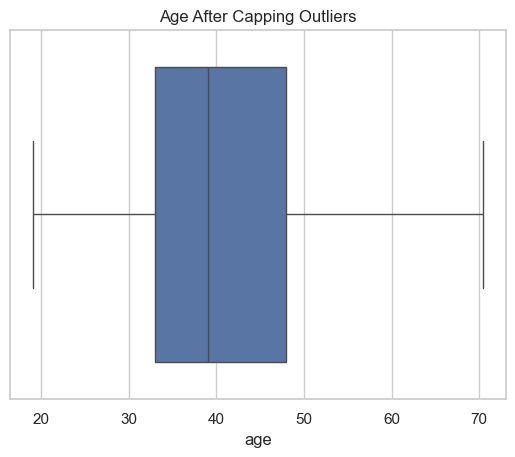

In [17]:
'#age after outliers r'
sns.boxplot(x='age', data=train_data)
plt.title('Age After Capping Outliers')
plt.show()


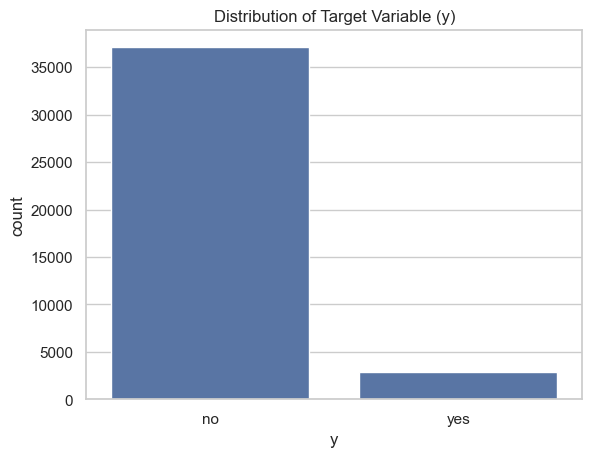

In [18]:
# count of target variable 'y'
sns.countplot(x='y', data=train_data)
plt.title('Distribution of Target Variable (y)')
plt.show()


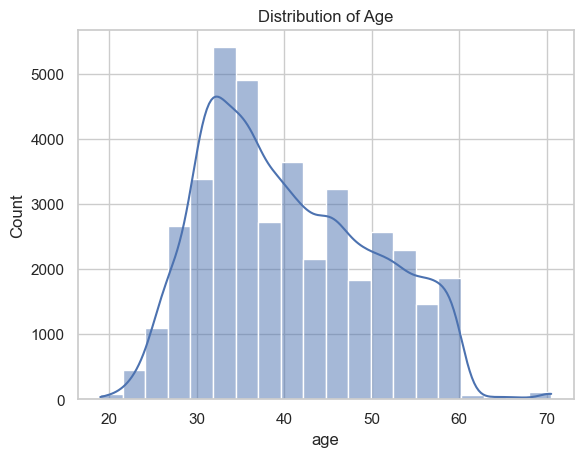

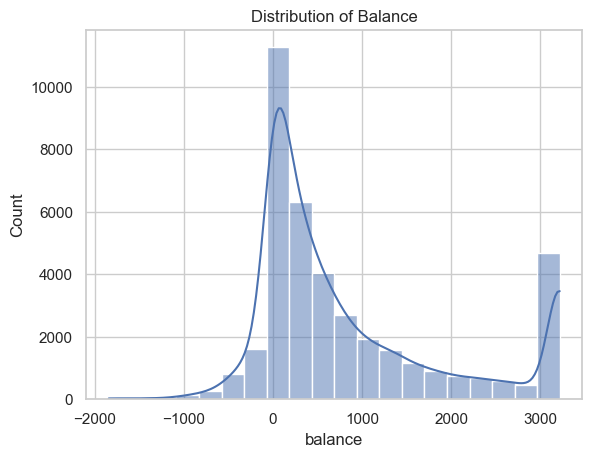

In [19]:
# Distribution of 'age'
sns.histplot(train_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of 'balance'
sns.histplot(train_data['balance'], bins=20, kde=True)
plt.title('Distribution of Balance')
plt.show()



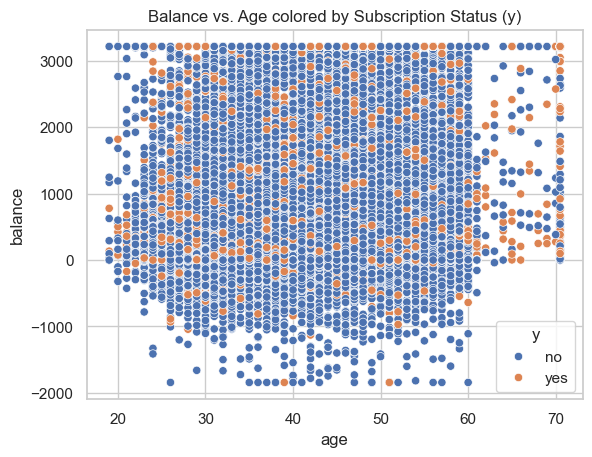

In [20]:
# Age VS Balance
sns.scatterplot(x='age', y='balance', hue='y', data=train_data)
plt.title('Balance vs. Age colored by Subscription Status (y)')
plt.show()

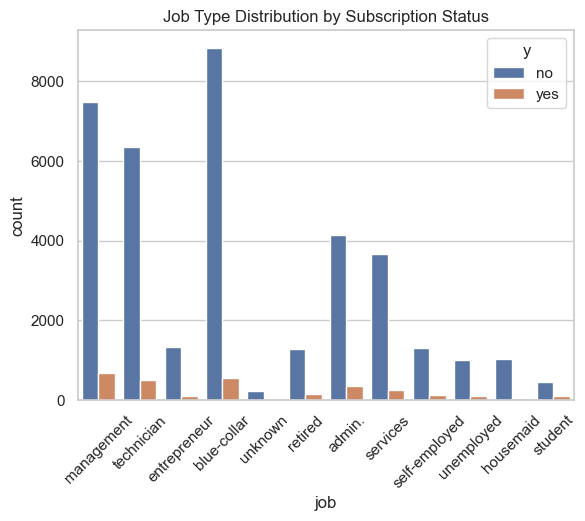

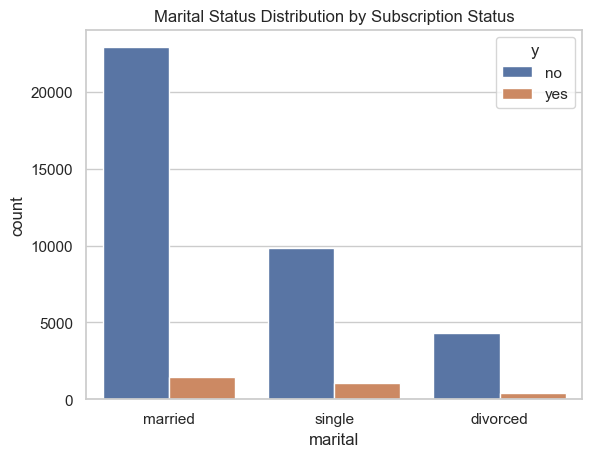

In [21]:
# count of each job type, colored by 'y' status
sns.countplot(x='job', hue='y', data=train_data)
plt.title('Job Type Distribution by Subscription Status')
plt.xticks(rotation=45)
plt.show()

# for 'marital' status
sns.countplot(x='marital', hue='y', data=train_data)
plt.title('Marital Status Distribution by Subscription Status')
plt.show()


In [22]:
# Encoding categorical variables
le = LabelEncoder()


train_data['y'] = le.fit_transform(train_data['y'])


categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


for col in categorical_cols:
    le.fit(train_data[col])
    train_data[col] = le.transform(train_data[col])


    test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


In [23]:
# Define X (features) and y (target)
X = train_data.drop(columns=['y'])
y = train_data['y']

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.934875
F1 Score: 0.4152637485970819


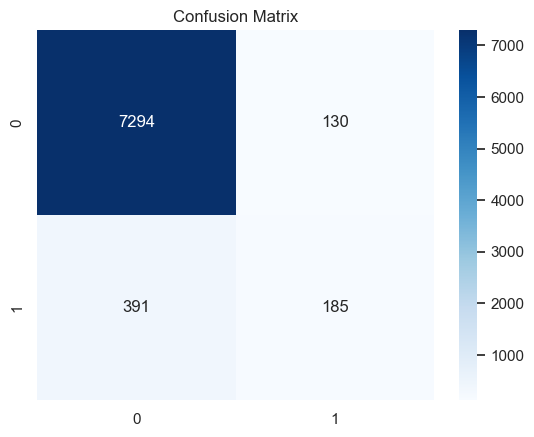

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7424
           1       0.59      0.32      0.42       576

    accuracy                           0.93      8000
   macro avg       0.77      0.65      0.69      8000
weighted avg       0.92      0.93      0.93      8000



KeyError: 'y'

In [24]:
# Predict on validation set
y_pred = model.predict(X_val)

# Calculate accuracy and F1 score o
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_val, y_pred))
test_data['y'] = test_data['y'].map({0: 'no', 1: 'yes'})


In [ ]:
test_data

In [25]:
test_data.to_csv('predition_test.csv', index=False)